# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import warnings
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
from datetime import datetime as dt
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Utility lambda method to get cryptocurrency value in USD
get_crypto_price = lambda url, id_key: requests.get(url).json()["data"][id_key]["quotes"]["USD"]["price"]

In [6]:
# Fetch current BTC price
btc_price = get_crypto_price(btc_url,"1")

# Fetch current ETH price
eth_price = get_crypto_price(eth_url,"1027")

# Compute current value of my crpto
my_btc_value = my_btc * btc_price 
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22882.01
The current value of your 5.3 ETH is $6797.99


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca_api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [9]:
# Utility method to convert current date to same date last year
def get_last_year(date):
    # Convert date to list
    date = list(date)
    # Subtract 1 from end of year
    date[3] = str(int(date[3])-1)
    # Return and join date as string
    return ''.join(date)

In [10]:
# Utility method to separate ticker data
def separate_ticker_data(df,ticker):
    # Symbol Column
    symbol = 'symbol'
    # Return DataFrame by ticker and drop several columns
    return df[df[symbol]==ticker].drop(columns=[symbol,'trade_count','vwap'], axis=1)

In [11]:
# Variable for date timezone
timezone = 'America/New_York'

In [12]:
# Utility lambda method to concatenate DataFrames
concatinate_dfs = lambda dataframes: pd.concat(dataframes, axis=1, join='inner', keys=["AGG", "SPY"])

In [13]:
# Format current date as ISO format
iso_date_today = pd.Timestamp(dt.today().strftime('%Y-%m-%d'), tz=timezone).isoformat()
iso_date_last_year = get_last_year(iso_date_today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
spy_agg_df = alpaca_api.get_bars(tickers,
                                 timeframe,
                                 start=iso_date_last_year,
                                 end=iso_date_today).df
# Reorganize the DataFrame
# Separate ticker data
agg_df = separate_ticker_data(spy_agg_df, tickers[0])
spy_df = separate_ticker_data(spy_agg_df, tickers[1])

# Concatenate the ticker DataFrames
spy_agg_df = concatinate_dfs([agg_df,spy_df])
# Preview DataFrame
spy_agg_df.head()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
timestamp                                                                      
2021-10-11 04:00:00+00:00  114.01  114.065  113.940  113.95  2178356  437.10   
2021-10-12 04:00:00+00:00  114.17  114.380  114.110  114.37  3688376  435.67   
2021-10-13 04:00:00+00:00  114.43  114.640  114.415  114.63  5520871  434.69   
2021-10-14 04:00:00+00:00  114.70  114.850  114.630  114.85  4094467  439.06   
2021-10-15 04:00:00+00:00  114.61  114.630  114.510  114.57  4637872  444.80   

                                                             
                             high     low   close    volume  
timestamp                                                    
2021-10-11 04:00:00+00:00  440.26  434.62  434.69  64739711  
2021-10-12 04:00:00+00:00  436.10  432.78  433.62  70277017  
2021-10-13 04:00:00+00:00  436.05  431.54  435.18  72061830  
2021-10-14 04:00:00+00:00  442.66  438.58  442.50  69791487  
2021-10-15 04:00:00+00:00  446.26  444.09  445.87  65494612

In [14]:
# Utility lambda method to get latest closing price
get_latest_close = lambda df: df['close'][-1]

In [15]:
# Pick AGG and SPY close prices
agg_close_price = get_latest_close(agg_df)
spy_close_price = get_latest_close(spy_df)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.4
Current SPY closing price: $357.74


In [16]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17887.00
The current value of your 200 AGG shares is $19080.00


### Savings Health Analysis

In [17]:
# String varible for amount
amount = 'amount'

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame(data=[crypto,shares],index=['crypto', 'shares'], columns=[amount])

# Display savings DataFrame
display(df_savings)

,amount
crypto,29680.0
shares,36967.0


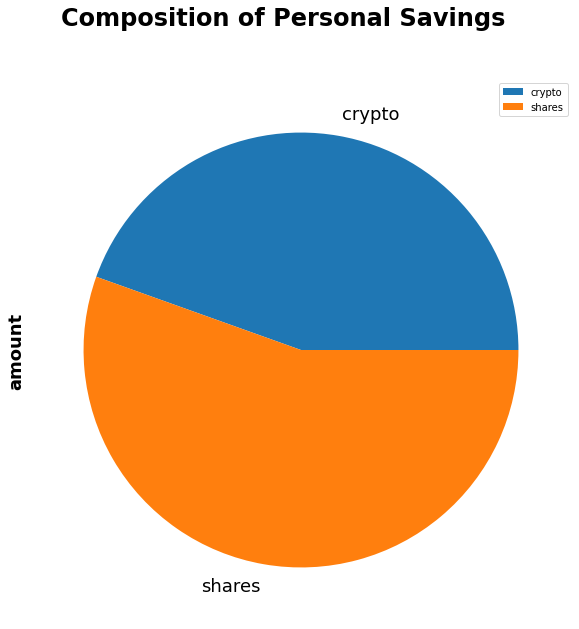

In [19]:
# Plot savings pie chart

# Varible for fontweight
fontweight_bold = 'bold'
# Variable for font size
fontsize_medium = 18

# Plotting Pie Chart
df_savings.plot.pie(y=amount,figsize=(20,10), fontsize=fontsize_medium);

# Setting Plot fontweight
plt.plot(fontweight=fontweight_bold);
# Styling Y Label
plt.ylabel(amount, fontsize=fontsize_medium, fontweight=fontweight_bold);
# Styling title
plt.suptitle('Composition of Personal Savings', fontsize=24, fontweight=fontweight_bold);

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings[amount].sum()

# Validate saving health

# If savings are greater than emergency fund, print congratulations message
if savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
# If savings are equal to emergency fund, print congratulations message
elif savings == emergency_fund:
    print('Congratulations! You have reached your savings goal.')
# Savings are less than emergency fund, print money needed to reach savings goal message
else:
    money_needed = emergency_fund-savings
    print(f'You need ${money_needed} more dollars to reach your savings goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz=timezone).isoformat()
end_date = pd.Timestamp('2021-05-01', tz=timezone).isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
spy_agg_df = alpaca_api.get_bars(tickers, timeframe,
                                    start=start_date,
                                    end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
agg_df = separate_ticker_data(spy_agg_df, tickers[0])
spy_df = separate_ticker_data(spy_agg_df, tickers[1])


# Concatenate the ticker DataFrames
stock_data_df = concatinate_dfs([agg_df,spy_df])

# Display sample data
stock_data_df.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                              SPY                                     
                             open    high     low   close     volume  
timestamp                                                             
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515  
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142  
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810  
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222  
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004

In [23]:
# Utility method to return MCSimulation object by years
get_MCSimulation = lambda years: MCSimulation(portfolio_data = stock_data_df,
                                              weights = [.40,.60],
                                              num_simulation = 500,
                                              num_trading_days = 252*years)

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_simulation = get_MCSimulation(30)

In [25]:
# Printing the simulation input data
monte_carlo_simulation.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                           SPY                          \
                          daily_return    open    high     low   close   
timestamp                                                                
2016-05-02 04:00:00+00:00          NaN  206.90  208.18  206.41  208.03   
2016-05-03 04:00:00+00:00     0.001808  206.50  206.80  205.28  206.13   
2016-05-04 04:00:00+00:00     0.000451  205.00  205.85  204.42  204.96   
2016-05-05 04:00:00+00:00     0.002526  205.57  205.98  204.47  204.95   
2016-05-06 04:00:00+00:00    -0.001530  204.04  205.77  203.88  205.70   

                                                   
                              volume daily_return  
timestamp                                          
2016-05-02 04:00:00+00:00   61908515          NaN  
2016-05-03 04:00:00+00:00  106422142    -0.009133  
2016-05-04 04:00:00+00:00   92199810    -0.005676  
2016-05-05 04:00:00+00:00   67597222    -0.000049  
2016-05-06 04:00:00+00:00   89131004     0.003659

In [26]:
# Supress warnings
warnings.filterwarnings('ignore')

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987505,0.995625,0.996264,1.010241,1.004746,0.998174,1.006948,1.009392,1.018243,0.983334,...,1.006172,1.006352,0.988313,1.004627,1.011038,0.994598,0.991873,0.993110,1.001846,0.991042
2,0.990669,0.995828,1.002540,1.015940,1.009283,1.003662,0.994772,1.007965,1.016376,0.980385,...,1.015797,1.004536,0.984623,1.003473,1.010089,0.990714,0.979194,0.991422,1.008676,0.984419
3,0.994195,0.999737,1.008866,1.018779,1.009863,1.008056,0.999115,1.007700,1.009192,0.984166,...,1.014577,0.997004,0.979711,1.010442,1.011312,0.980111,0.984631,0.988280,1.004769,0.994242
4,1.001612,1.000164,1.015563,1.015498,1.004292,1.000836,1.001230,1.020276,1.010147,0.987444,...,1.009652,0.996509,0.974609,1.004978,1.019998,0.979775,0.994015,1.007810,1.029450,0.996732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.220383,9.625469,55.816834,23.607643,5.256659,3.381990,26.187142,19.474874,15.635053,23.841035,...,31.116925,9.424884,7.205954,9.790292,17.157386,17.930030,7.285366,15.233865,14.094125,12.993571
7557,6.164554,9.796888,56.358396,23.546073,5.230801,3.350968,26.066361,19.563174,15.712767,23.838205,...,31.351225,9.473690,7.191185,9.814700,17.075773,18.053525,7.230420,15.060239,13.919788,13.180085
7558,6.172563,9.728042,56.540284,23.591866,5.241770,3.396812,26.155340,19.612159,15.629688,23.537524,...,31.153279,9.385105,7.123908,9.737145,17.181572,18.083555,7.199657,15.316989,14.116558,13.231764
7559,6.148718,9.653647,55.933250,23.909309,5.271887,3.398103,26.102200,19.357255,15.758986,23.502750,...,31.444626,9.377819,7.140451,9.641692,17.331230,18.200380,7.235875,15.101930,14.002932,13.112068


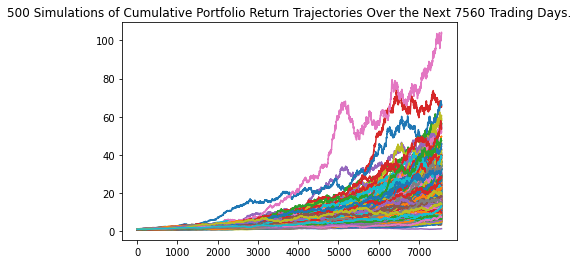

In [28]:
# Plot simulation outcomes
monte_carlo_simulation.plot_simulation();

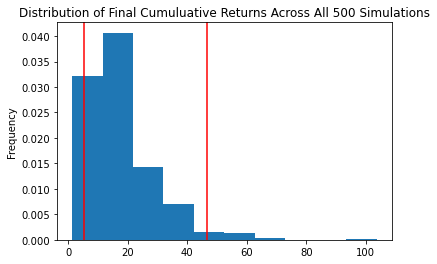

In [29]:
# Plot probability distribution and confidence intervals
monte_carlo_simulation.plot_distribution();

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_statistics = monte_carlo_simulation.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_statistics)

count           500.000000
mean             17.814926
std              11.441535
min               1.282769
25%              10.331949
50%              14.650546
75%              21.898073
max             103.581846
95% CI Lower      5.137294
95% CI Upper     46.717939
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Utility method to get lower and upper confidence interval multiplied by investment
def calulate_ci_range(investment): 
    # Lambda method to calculate investment times CI rounded to two digits by index
    get_ci_by_investment = lambda index: round(investment * simulation_summary_statistics[index], 2)
    # Returning values for lower and upper CI
    return [get_ci_by_investment(8),get_ci_by_investment(9)]

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower, ci_upper = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $102745.87 and $934358.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower, ci_upper = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $154118.81 and $1401538.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_simulation = get_MCSimulation(5)

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997548,0.997682,0.985863,0.998855,1.015291,0.989515,1.001631,1.004749,1.002076,1.001410,...,1.015183,0.997503,0.992728,1.000961,1.004220,0.997009,0.994804,0.996266,0.993099,0.996792
2,0.990611,0.991154,0.980335,1.004619,1.020385,0.993150,0.991894,1.007164,1.004978,0.993438,...,1.017505,0.984139,0.992795,0.994395,1.004166,0.991361,0.998743,1.000578,0.995032,0.986273
3,1.003429,0.992673,0.974381,1.010893,1.026956,1.006382,0.996517,1.000525,1.008971,0.967226,...,1.013177,0.993825,0.988306,0.988614,1.008522,0.993243,0.995802,0.987829,0.990801,0.988009
4,1.004031,0.991301,0.966007,1.009907,1.020909,1.018608,0.986607,1.001659,1.005281,0.963936,...,1.005998,1.003922,0.995040,0.986377,1.005128,0.992334,0.986764,0.984206,0.995259,0.991140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.243235,1.494272,2.394559,1.320274,1.520315,1.883044,1.396313,2.261814,2.094321,1.406475,...,2.099094,2.402694,1.707075,1.256896,1.988148,1.762633,2.019605,1.764637,0.886072,1.813370
1257,1.236817,1.500744,2.381035,1.296376,1.523658,1.883517,1.400378,2.276770,2.077349,1.410948,...,2.115633,2.375444,1.715138,1.254881,1.970825,1.743813,2.007040,1.753823,0.878205,1.818495
1258,1.234671,1.506392,2.381210,1.288292,1.522807,1.895372,1.393360,2.269655,2.075188,1.422299,...,2.114687,2.364208,1.712688,1.261591,1.995321,1.761699,2.024178,1.749612,0.880384,1.825105
1259,1.234386,1.502333,2.352120,1.280551,1.528952,1.894742,1.402874,2.267486,2.053238,1.428021,...,2.078911,2.370990,1.712205,1.253814,2.000685,1.762146,2.035135,1.763927,0.875477,1.821377


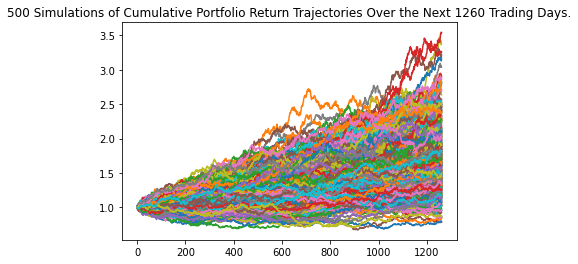

In [36]:
# Plot simulation outcomes
monte_carlo_simulation.plot_simulation();

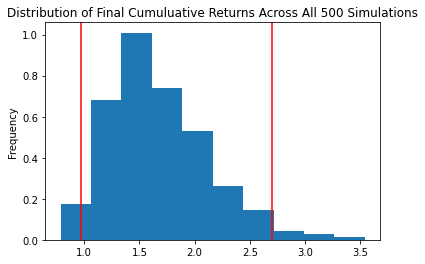

In [37]:
# Plot probability distribution and confidence intervals
monte_carlo_simulation.plot_distribution();

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_statistics = monte_carlo_simulation.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_statistics)

count           500.000000
mean              1.672378
std               0.454248
min               0.785744
25%               1.346770
50%               1.602386
75%               1.929405
max               3.540631
95% CI Lower      0.972158
95% CI Upper      2.700112
Name: 1260, dtype: float64


In [39]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five, ci_upper_five = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58329.46 and $162006.73


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_simulation = get_MCSimulation(10)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999226,0.997203,1.019536,1.006171,0.996074,1.001932,1.005141,0.998527,0.994886,1.008579,...,0.992926,0.991139,1.001332,1.001097,1.000010,1.004252,1.005050,0.993079,0.998072,0.985214
2,1.002710,0.990314,1.017377,1.012918,1.006714,0.998273,1.016810,1.001869,0.990703,1.009947,...,0.990809,0.991368,1.010773,0.995601,0.997262,1.010930,1.006553,0.979551,1.003433,0.989395
3,1.015622,0.978381,1.014796,1.021174,1.007870,0.998926,1.003110,0.997113,1.000926,1.015305,...,0.986642,0.991434,1.004473,0.997049,0.997591,1.006402,1.002081,0.988201,1.002291,0.988005
4,1.016399,0.975436,1.016459,1.037328,1.000281,0.993163,1.020358,0.997739,1.004524,1.024894,...,0.988369,0.991918,0.988336,0.986379,0.992546,1.000893,1.000633,0.975146,1.007108,0.976060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.940460,1.892053,1.425584,2.711136,2.476558,2.350650,2.826217,1.675588,1.753136,2.774380,...,3.132661,2.082031,2.274309,1.729056,3.167909,2.475409,2.247875,2.685315,3.607349,2.076397
2517,2.949681,1.905715,1.435386,2.687253,2.470396,2.344724,2.818537,1.692748,1.772321,2.781747,...,3.158232,2.075855,2.276793,1.710327,3.199162,2.476722,2.261801,2.720457,3.623358,2.093329
2518,2.965447,1.896085,1.457716,2.709370,2.476120,2.344191,2.839157,1.696718,1.785944,2.753395,...,3.169278,2.091669,2.297651,1.708412,3.229890,2.470030,2.255762,2.721506,3.621956,2.111760
2519,2.965278,1.899114,1.463640,2.698773,2.496656,2.353420,2.843753,1.702289,1.793865,2.746794,...,3.203158,2.091648,2.324777,1.692659,3.230852,2.442563,2.269841,2.731250,3.679048,2.101147


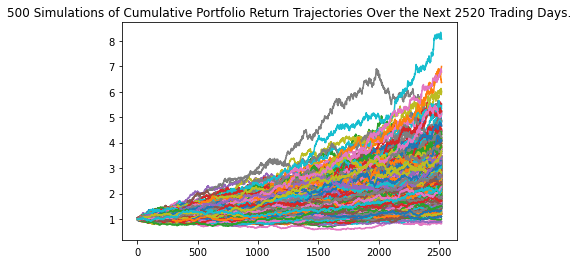

In [42]:
# Plot simulation outcomes
monte_carlo_simulation.plot_simulation();

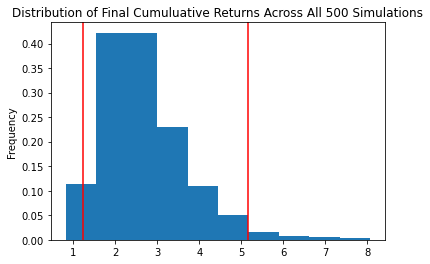

In [43]:
# Plot probability distribution and confidence intervals
monte_carlo_simulation.plot_distribution();

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_statistics = monte_carlo_simulation.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_statistics)

count           500.000000
mean              2.681016
std               1.000947
min               0.820321
25%               1.976013
50%               2.506377
75%               3.167800
max               8.071152
95% CI Lower      1.231718
95% CI Upper      5.154965
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten, ci_upper_ten = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73903.11 and $309297.89
